In [ ]:
import re
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from nltk.corpus import stopwords
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
train  = pd.read_csv("/trainData.csv",sep=",", encoding='cp1252')
test = pd.read_csv("/testData.csv",sep=",", encoding='cp1252')
train.head()

,label,tweet
0,0,lily allen came to philly tonight and hid those ticktes that could have been me
1,0,ugggghhhh que maldito hangovabut i had a blast last nightgood times good times all good things must come to an end eventually
2,1,immediatei amsitting on the top of a scaffolding 6 floors high idk i want to die so badly and the things keeping me are vanishingi amloosing it the only things keeping me are friends and they are ...
3,0,today is day 1 of my fast amp i feel i may break b4 i go 2 bed i must hold out til the end of the wk must stayed focused wish me luck
4,0,hellacopters is the perfect longboarding soundtrack if i only had the board


In [ ]:
train[train['label'] == 0].head(10)

,label,tweet
0,0,lily allen came to philly tonight and hid those ticktes that could have been me
1,0,ugggghhhh que maldito hangovabut i had a blast last nightgood times good times all good things must come to an end eventually
3,0,today is day 1 of my fast amp i feel i may break b4 i go 2 bed i must hold out til the end of the wk must stayed focused wish me luck
4,0,hellacopters is the perfect longboarding soundtrack if i only had the board
6,0,am feeling dejected why must there be any double standard
7,0,aaron is not feeling the best today
9,0,my view of thhe game
10,0,same had an unproductive morning too
12,0,it still kills me how the big reveal of the game failed on me because the game expected me to make a buff military man to represent myself even as a cis dude i was like nah
14,0,i don t want to lose you


In [ ]:
combi = train.append(test, ignore_index=True)

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
print('Dataset size:',train.shape)
print('columns are:',train.columns)

Dataset size: (7365, 2)
columns are: Index(['label', 'tweet'], dtype='object')


In [ ]:
print('Dataset size:',test.shape)
print('columns are:',test.columns)

Dataset size: (1841, 2)
columns are: Index(['label', 'tweet'], dtype='object')


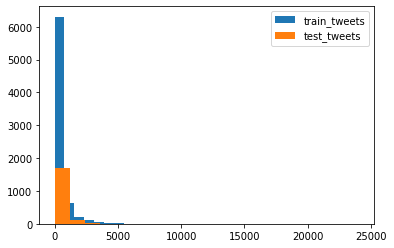

In [ ]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [ ]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [ ]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
combi.head()

,label,tweet,tidy_tweet
0,0,lily allen came to philly tonight and hid those ticktes that could have been me,lily allen came philly tonight and hid those ticktes that could have been
1,0,ugggghhhh que maldito hangovabut i had a blast last nightgood times good times all good things must come to an end eventually,ugggghhhh que maldito hangovabut had blast last nightgood times good times all good things must come end eventually
2,1,immediatei amsitting on the top of a scaffolding 6 floors high idk i want to die so badly and the things keeping me are vanishingi amloosing it the only things keeping me are friends and they are ...,immediatei amsitting the top scaffolding floors high idk want die badly and the things keeping are vanishingi amloosing the only things keeping are friends and they are all asleep nobody there
3,0,today is day 1 of my fast amp i feel i may break b4 i go 2 bed i must hold out til the end of the wk must stayed focused wish me luck,today day fast amp feel may break bed must hold out til the end the must stayed focused wish luck
4,0,hellacopters is the perfect longboarding soundtrack if i only had the board,hellacopters the perfect longboarding soundtrack only had the board


In [ ]:
#Tokernization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                                                                                                    [lily, allen, came, philly, tonight, and, hid, those, ticktes, that, could, have, been]
1                                                                     [ugggghhhh, que, maldito, hangovabut, had, blast, last, nightgood, times, good, times, all, good, things, must, come, end, eventually]
2    [immediatei, amsitting, the, top, scaffolding, floors, high, idk, want, die, badly, and, the, things, keeping, are, vanishingi, amloosing, the, only, things, keeping, are, friends, and, they, are,...
3                                                                                     [today, day, fast, amp, feel, may, break, bed, must, hold, out, til, the, end, the, must, stayed, focused, wish, luck]
4                                                                                                                              [hellacopters, the, perfect, longboarding, soundtrack

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                                                                                                                      [lili, allen, came, philli, tonight, and, hid, those, tickt, that, could, have, been]
1                                                                            [ugggghhhh, que, maldito, hangovabut, had, blast, last, nightgood, time, good, time, all, good, thing, must, come, end, eventu]
2    [immediatei, amsit, the, top, scaffold, floor, high, idk, want, die, badli, and, the, thing, keep, are, vanishingi, amloos, the, onli, thing, keep, are, friend, and, they, are, all, asleep, nobodi...
3                                                                                         [today, day, fast, amp, feel, may, break, bed, must, hold, out, til, the, end, the, must, stay, focus, wish, luck]
4                                                                                                                                    [hellacopt, the, perfect, longboard, soundtrack

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

In [ ]:
import nltk.corpus
nltk.download('stopwords')
# stopword = nltk.corpus.stopwords.words('english')
# stopword.extend(['fuck', 'shit'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['fuck', 'shit'])

In [ ]:
def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

# combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: remove_stopwords(x)) # stemming
# combi.head()

combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword)]))
combi.head()

,label,tweet,tidy_tweet
0,0,lily allen came to philly tonight and hid those ticktes that could have been me,lili allen came philli tonight hid tickt could
1,0,ugggghhhh que maldito hangovabut i had a blast last nightgood times good times all good things must come to an end eventually,ugggghhhh que maldito hangovabut blast last nightgood time good time good thing must come end eventu
2,1,immediatei amsitting on the top of a scaffolding 6 floors high idk i want to die so badly and the things keeping me are vanishingi amloosing it the only things keeping me are friends and they are ...,immediatei amsit top scaffold floor high idk want die badli thing keep vanishingi amloos onli thing keep friend asleep nobodi
3,0,today is day 1 of my fast amp i feel i may break b4 i go 2 bed i must hold out til the end of the wk must stayed focused wish me luck,today day fast amp feel may break bed must hold til end must stay focus wish luck
4,0,hellacopters is the perfect longboarding soundtrack if i only had the board,hellacopt perfect longboard soundtrack onli board


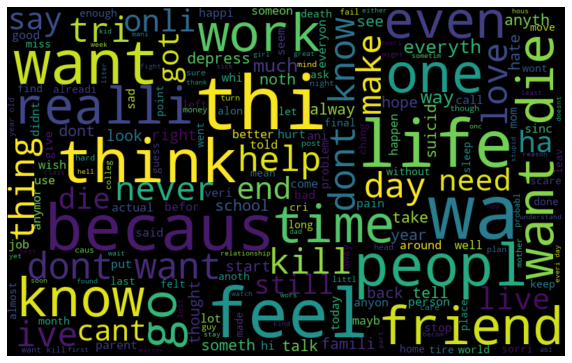

In [ ]:
#visualize all the words our data using the wordcloud plot
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

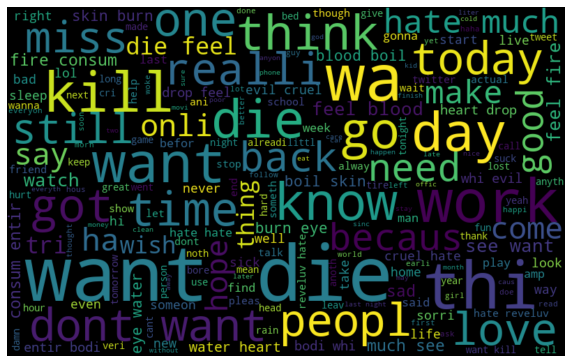

In [ ]:
#Non-suicide
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

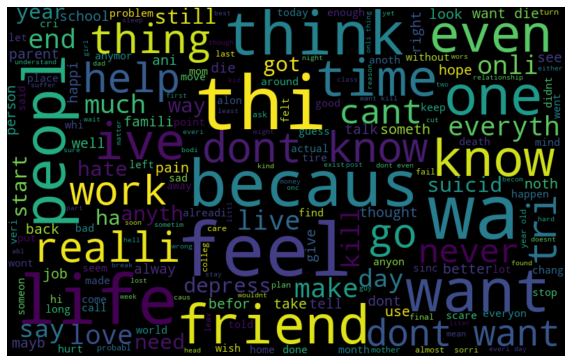

In [ ]:
#Suicide
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Bag-of-words
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape
# bow[:5]

(9206, 1000)

In [ ]:
#Tf-IDF
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(9206, 1000)

In [ ]:
#Word embbeding
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(5795216, 7040240)

In [ ]:
model_w2v.wv.most_similar(positive="suicid")

[('outset', 0.561046838760376),
 ('upward', 0.5571531653404236),
 ('rewritten', 0.5538429021835327),
 ('darkest', 0.5532195568084717),
 ('comit', 0.5503872036933899),
 ('involuntarili', 0.5402021408081055),
 ('sanction', 0.5372884273529053),
 ('thisiv', 0.5360026955604553),
 ('ideat', 0.5344887971878052),
 ('desensit', 0.5332630276679993)]

In [ ]:
model_w2v.wv.most_similar(positive="die")

[('notexist', 0.6305574178695679),
 ('want', 0.625689685344696),
 ('bbi', 0.5615118741989136),
 ('woodi', 0.5571718811988831),
 ('ene', 0.5564917325973511),
 ('orbit', 0.555582582950592),
 ('nevi', 0.5451669692993164),
 ('rlli', 0.5444247722625732),
 ('psychologu', 0.5417361259460449),
 ('elderli', 0.5398657917976379)]

In [ ]:
model_w2v['suicid']

array([ 0.29100582,  0.04663018,  0.26302812,  0.32922986,  0.2596997 ,
        0.3900203 ,  0.14076883, -0.26185587, -0.08143278,  0.19139408,
       -0.09155835,  0.2655864 ,  0.03906703,  0.43620104,  0.04643121,
        0.40890813,  0.03764642, -0.10713149, -0.37161726, -0.00134589,
        0.14672972, -0.37046903,  0.19806214,  0.07837357, -0.34879518,
       -0.33890575,  0.29533175, -0.16060035,  0.72927576,  0.31190342,
        0.38982266,  0.06455036, -0.13441436, -0.02929564,  0.19709861,
        0.08391736, -0.12070136,  0.49687156, -0.26028442, -0.38586968,
       -0.01597461,  0.05225783,  0.09784233, -0.20540348,  0.02485315,
        0.20941257, -0.13897054,  0.19482978, -0.08776665,  0.2989403 ,
       -0.2835496 , -0.2388052 ,  0.31180722, -0.06618872,  0.12655145,
        0.32700583, -0.23535967,  0.16298264,  0.15171058,  0.38219622,
       -0.31501353,  0.16591646, -0.23646249, -0.16164112,  0.13837342,
        0.27266926, -0.02922525,  0.26080438,  0.22133201,  0.17

In [ ]:
len(model_w2v['suicid']) #The length of the vector is 200

200

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(9206, 200)

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [ ]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [ ]:
labeled_tweets[:6]

[LabeledSentence(words=['lili', 'allen', 'came', 'philli', 'tonight', 'hid', 'tickt', 'could'], tags=['tweet_0']),
 LabeledSentence(words=['ugggghhhh', 'que', 'maldito', 'hangovabut', 'blast', 'last', 'nightgood', 'time', 'good', 'time', 'good', 'thing', 'must', 'come', 'end', 'eventu'], tags=['tweet_1']),
 LabeledSentence(words=['immediatei', 'amsit', 'top', 'scaffold', 'floor', 'high', 'idk', 'want', 'die', 'badli', 'thing', 'keep', 'vanishingi', 'amloos', 'onli', 'thing', 'keep', 'friend', 'asleep', 'nobodi'], tags=['tweet_2']),
 LabeledSentence(words=['today', 'day', 'fast', 'amp', 'feel', 'may', 'break', 'bed', 'must', 'hold', 'til', 'end', 'must', 'stay', 'focus', 'wish', 'luck'], tags=['tweet_3']),
 LabeledSentence(words=['hellacopt', 'perfect', 'longboard', 'soundtrack', 'onli', 'board'], tags=['tweet_4']),
 LabeledSentence(words=['need', 'someon', 'need', 'vent', 'everyth', 'ha', 'come', 'crash', 'need', 'someon', 'talk'], tags=['tweet_5'])]

In [ ]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 9206/9206 [00:00<00:00, 1202365.41it/s]


In [ ]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

In [ ]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(9206, 200)

In [ ]:
#Model buiding
#Logical Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
# Bag-of-Words Features
train_bow = bow[:7365,:]
test_bow = bow[7365:,:]

# train_bow = bow[:7365,0:1]
# test_bow = bow[7365:,1:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow.toarray(), train['label'],  
                                                          random_state=42, 
                                                          test_size=0.2)
# xtrain_bow, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
train_bow.shape

(7365, 1000)

In [ ]:

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.2 
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.8460977388767322

In [ ]:
# TI-IDF Features
train_tfidf = tfidf[:7365,:]
test_tfidf = tfidf[7365:,:]

xtrain_tfidf = train_tfidf[ytrain.index].toarray()
xvalid_tfidf = train_tfidf[yvalid.index].toarray()


In [ ]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.2
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.8137839628893306

In [ ]:
# Word2vec Features
train_w2v = wordvec_df.iloc[:7365,:]
test_w2v = wordvec_df.iloc[7365:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

xtrain_w2v.shape
# xvalid_w2v.shape

(5892, 200)

In [ ]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.2
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.7966321243523317

In [ ]:
# Doc2Vec Features
train_d2v = docvec_df.iloc[:7365,:]
test_d2v = docvec_df.iloc[7365:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [ ]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.2
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.7480314960629921

In [ ]:
# Support Vector Machine
from sklearn import svm

In [ ]:
# Bag-of-words Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.2
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.8331846565566458

In [ ]:
# TF-IDF Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.2
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.8494318181818181

In [ ]:
# Word2Vec Fetures
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.2
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.7958387516254876

In [ ]:
# Doc2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.2
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.7398989898989898

In [ ]:
# Neural Network
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

In [ ]:
# Bag-of-words Features

classifier=Sequential()

classifier.add(Dense(8, activation="relu", input_dim=1000))
classifier.add(Dense(8, activation="relu"))
classifier.add(Dense(1, activation="sigmoid"))
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
# classifier.summary()
history=classifier.fit(xtrain_bow, ytrain, batch_size=10, epochs=20, validation_data=(xvalid_bow, yvalid))

Epoch 1/20
590/590 [==============================] - 2s 2ms/step - loss: 0.3735 - accuracy: 0.8586 - val_loss: 0.2601 - val_accuracy: 0.8934
Epoch 2/20
590/590 [==============================] - 1s 2ms/step - loss: 0.2180 - accuracy: 0.9116 - val_loss: 0.2381 - val_accuracy: 0.8955
Epoch 3/20
590/590 [==============================] - 1s 2ms/step - loss: 0.1733 - accuracy: 0.9285 - val_loss: 0.2329 - val_accuracy: 0.9029
Epoch 4/20
590/590 [==============================] - 1s 2ms/step - loss: 0.1405 - accuracy: 0.9435 - val_loss: 0.2434 - val_accuracy: 0.9022
Epoch 5/20
590/590 [==============================] - 1s 2ms/step - loss: 0.1179 - accuracy: 0.9510 - val_loss: 0.2583 - val_accuracy: 0.8982
Epoch 6/20
590/590 [==============================] - 1s 2ms/step - loss: 0.0978 - accuracy: 0.9611 - val_loss: 0.2797 - val_accuracy: 0.9029
Epoch 7/20
590/590 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9678 - val_loss: 0.2904 - val_accuracy: 0.8961
Epoch 

In [ ]:
y_predict=classifier.predict(xvalid_bow)

y_predict=(y_predict>=0.2)

from sklearn import metrics
print(metrics.accuracy_score(yvalid,y_predict))

0.8744059742023083


In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# TF-IDF Feature
history1=classifier.fit(xtrain_tfidf, ytrain,batch_size=10,epochs=20, validation_data=(xvalid_tfidf, yvalid))
y_predict=classifier.predict(xvalid_tfidf)

y_predict=(y_predict>=0.2)

from sklearn import metrics
print(metrics.accuracy_score(yvalid,y_predict))

Epoch 1/20
590/590 [==============================] - 2s 3ms/step - loss: 0.0951 - accuracy: 0.9655 - val_loss: 0.3875 - val_accuracy: 0.8764
Epoch 2/20
590/590 [==============================] - 2s 3ms/step - loss: 0.0444 - accuracy: 0.9856 - val_loss: 0.4115 - val_accuracy: 0.8724
Epoch 3/20
590/590 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.4300 - val_accuracy: 0.8792
Epoch 4/20
590/590 [==============================] - 2s 3ms/step - loss: 0.0324 - accuracy: 0.9890 - val_loss: 0.4534 - val_accuracy: 0.8771
Epoch 5/20
590/590 [==============================] - 1s 3ms/step - loss: 0.0302 - accuracy: 0.9898 - val_loss: 0.4863 - val_accuracy: 0.8730
Epoch 6/20
590/590 [==============================] - 1s 2ms/step - loss: 0.0269 - accuracy: 0.9907 - val_loss: 0.5041 - val_accuracy: 0.8730
Epoch 7/20
590/590 [==============================] - 1s 2ms/step - loss: 0.0256 - accuracy: 0.9903 - val_loss: 0.5278 - val_accuracy: 0.8771
Epoch 

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# W2v features
classifier=Sequential()

classifier.add(Dense(8, activation="relu", input_dim=200))
classifier.add(Dense(8, activation="relu"))
classifier.add(Dense(1, activation="sigmoid"))
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history2=classifier.fit(xtrain_w2v, ytrain,batch_size=10,epochs=20, validation_data=(xvalid_w2v, yvalid))
y_predict=classifier.predict(xvalid_w2v)

y_predict=(y_predict>=0.2)

from sklearn import metrics
print(metrics.accuracy_score(yvalid,y_predict))

Epoch 1/20
590/590 [==============================] - 2s 2ms/step - loss: 0.4880 - accuracy: 0.7889 - val_loss: 0.3882 - val_accuracy: 0.8473
Epoch 2/20
590/590 [==============================] - 1s 2ms/step - loss: 0.3604 - accuracy: 0.8581 - val_loss: 0.3620 - val_accuracy: 0.8527
Epoch 3/20
590/590 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.8666 - val_loss: 0.3529 - val_accuracy: 0.8540
Epoch 4/20
590/590 [==============================] - 1s 2ms/step - loss: 0.3221 - accuracy: 0.8730 - val_loss: 0.3403 - val_accuracy: 0.8601
Epoch 5/20
590/590 [==============================] - 1s 2ms/step - loss: 0.3090 - accuracy: 0.8742 - val_loss: 0.3309 - val_accuracy: 0.8622
Epoch 6/20
590/590 [==============================] - 1s 2ms/step - loss: 0.2984 - accuracy: 0.8807 - val_loss: 0.3255 - val_accuracy: 0.8656
Epoch 7/20
590/590 [==============================] - 1s 2ms/step - loss: 0.2879 - accuracy: 0.8807 - val_loss: 0.3205 - val_accuracy: 0.8710
Epoch 

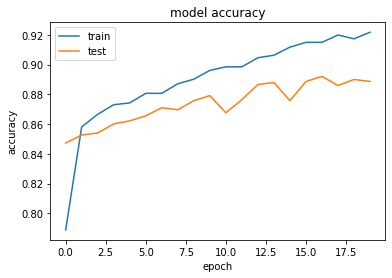

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

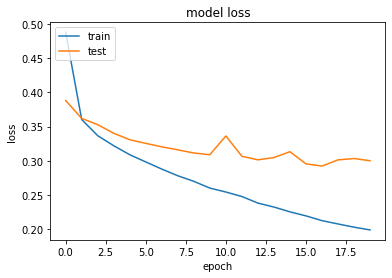

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Doc2vec Features
classifier=Sequential()

classifier.add(Dense(8, activation="relu", input_dim=200))
classifier.add(Dense(8, activation="relu"))
classifier.add(Dense(1, activation="sigmoid"))
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history3=classifier.fit(xtrain_d2v, ytrain,batch_size=10,epochs=20, validation_data=(xvalid_d2v, yvalid))
y_predict=classifier.predict(xvalid_d2v)

y_predict=(y_predict>=0.2)

from sklearn import metrics
print(metrics.accuracy_score(yvalid,y_predict))

Epoch 1/20
590/590 [==============================] - 2s 2ms/step - loss: 0.5268 - accuracy: 0.7783 - val_loss: 0.4190 - val_accuracy: 0.8452
Epoch 2/20
590/590 [==============================] - 1s 2ms/step - loss: 0.3609 - accuracy: 0.8610 - val_loss: 0.3402 - val_accuracy: 0.8635
Epoch 3/20
590/590 [==============================] - 1s 2ms/step - loss: 0.3079 - accuracy: 0.8795 - val_loss: 0.3283 - val_accuracy: 0.8622
Epoch 4/20
590/590 [==============================] - 1s 2ms/step - loss: 0.2824 - accuracy: 0.8905 - val_loss: 0.3329 - val_accuracy: 0.8629
Epoch 5/20
590/590 [==============================] - 1s 2ms/step - loss: 0.2681 - accuracy: 0.8966 - val_loss: 0.3317 - val_accuracy: 0.8642
Epoch 6/20
590/590 [==============================] - 1s 2ms/step - loss: 0.2587 - accuracy: 0.9014 - val_loss: 0.3353 - val_accuracy: 0.8601
Epoch 7/20
590/590 [==============================] - 1s 2ms/step - loss: 0.2523 - accuracy: 0.9038 - val_loss: 0.3323 - val_accuracy: 0.8629
Epoch 

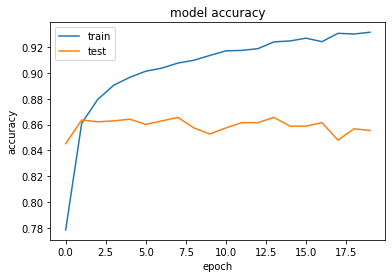

In [ ]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

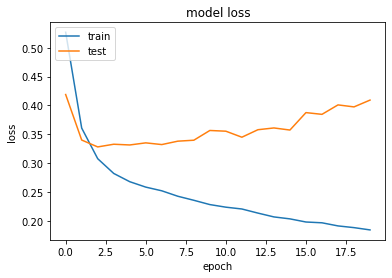

In [ ]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# LSTM
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# word-of-bag
model = Sequential()
model.add(Embedding(1000, 8, input_length=xtrain_bow.shape[1]))
# model.add(Embedding(input_dim=1000, output_dim=1))
model.add(Dropout(0.3))
# model.add(LSTM(1, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(8, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 8)           8000      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000, 8)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,553
Trainable params: 8,553
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(xtrain_bow, ytrain, epochs=5, batch_size=10, validation_data=(xvalid_bow, yvalid))

Epoch 1/5
590/590 [==============================] - 518s 804ms/step - loss: 0.6767 - accuracy: 0.4438 - val_loss: 0.6497 - val_accuracy: 0.4379
Epoch 2/5
590/590 [==============================] - 472s 800ms/step - loss: 0.6448 - accuracy: 0.4438 - val_loss: 0.8822 - val_accuracy: 0.4379
Epoch 3/5
590/590 [==============================] - 468s 793ms/step - loss: 0.7096 - accuracy: 0.4438 - val_loss: 0.6854 - val_accuracy: 0.4379
Epoch 4/5
590/590 [==============================] - 487s 826ms/step - loss: 0.6858 - accuracy: 0.4438 - val_loss: 0.6840 - val_accuracy: 0.4379
Epoch 5/5
590/590 [==============================] - 487s 826ms/step - loss: 0.6849 - accuracy: 0.4438 - val_loss: 0.6832 - val_accuracy: 0.4379


In [ ]:
y_predict=model.predict(xvalid_bow)

y_predict=(y_predict>=0.2)

from sklearn import metrics
print(metrics.accuracy_score(yvalid,y_predict))

0.4378818737270876


In [ ]:
# w2v
model = Sequential()
model.add(Embedding(200, 8, input_length=wordvec_df.shape[1]))
# model.add(Embedding(input_dim=1000, output_dim=1))
model.add(Dropout(0.3))
# model.add(LSTM(1, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(8, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 8)            1600      
_________________________________________________________________
dropout_5 (Dropout)          (None, 200, 8)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 2,153
Trainable params: 2,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(wordvec_df, ytrain, epochs=5, batch_size=10, validation_data=(xvalid_w2v, yvalid))

ValueError: ignored